C:\Users\mpm51\AppData\Local\Temp\ipykernel_26204\4237697854.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop(['전출지별'], axis=1, inplace=True)
C:\Users\mpm51\AppData\Local\Temp\ipykernel_26204\4237697854.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)


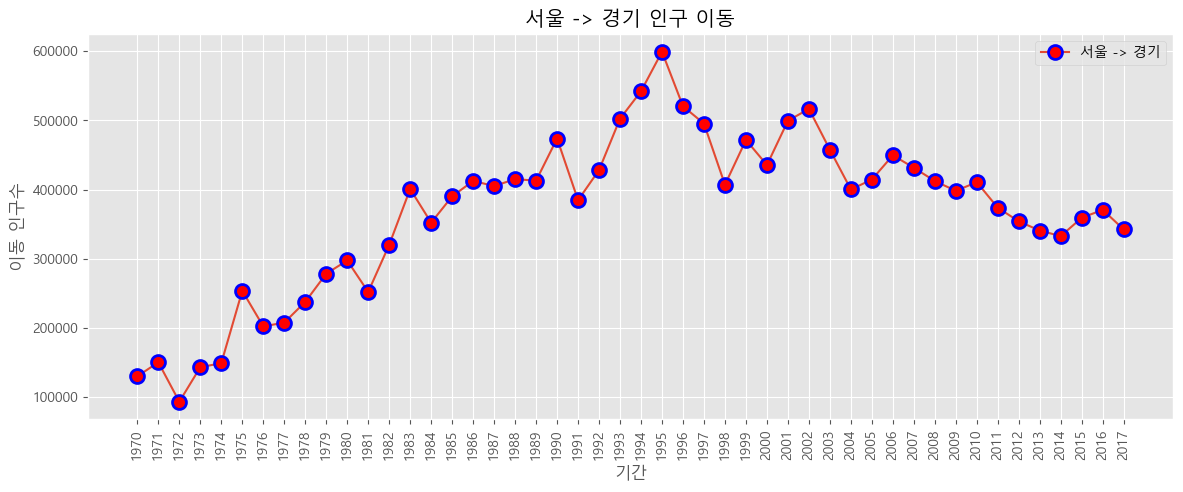

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

df = df.ffill()

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul.drop(['전출지별'], axis=1, inplace=True)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데인터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정, ggplot은 스타일 이름
plt.style.use('ggplot')

# 그림 사이즈 늘리기
plt.figure(figsize = (14,5))

# x축 눈금 레이블 회전하기
plt.xticks(rotation = 'vertical')

# x, y축 데이터를 plot 함수에 입력 (마커 표시 추가)
plt.plot(sr_one.index, sr_one.values,
         marker = 'o',
         markerfacecolor = 'red', # 마커의 내부 색상을 빨간색
         markeredgecolor = 'blue', # 마커의 테두리 색을 파란색
         markeredgewidth = 2, # 마커의 테두리 두께를 2포인트
         markersize = 10) # 마커 사이즈를 10 포인트로 설정하는 옵션

plt.title('서울 -> 경기 인구 이동', size = 30) # 차트 제목
plt.xlabel('기간', size = 20) # x축 이름
plt.ylabel('이동 인구수', size = 20) # y축 이름

# loc = 'best' best 옵션은 Matplotlib이 최적의 위치를 자동으로 선택함 , 다른 옵션들도 있음
# labels는 범례에 표시될 레이블 리스트를 설정한다.
plt.legend(labels = ['서울 -> 경기'], loc = 'best', fontsize = 15)

plt.show()